# Predicting Heart Disease

We are going to fit a logistic regression model to a dataset concerning heart disease.

## Obtain Data

In [1]:
# Import necessary functions
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import pandas as pd
import numpy as np

import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import data
df = pd.read_csv('datasets/heartdisease/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Whether or not a patient has heart disease is indicated in the column labeled 'target'. 1 is for positive for heart disease while 0 indicates no heart disease.

In [3]:
# Split the data into target and predictors
y = df['target']
X = df.drop('target', axis = 1)

## Data Preprocessing

In [4]:
# Normalize Data
X = X.apply( lambda x: (x - x.min())/(x.max() - x.min()), axis = 0)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


## Train Model

### Train-Test Split

In [5]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Fit Model

In [6]:
# Instantiate the model
logreg = LogisticRegression(fit_intercept = True, C = 1e12, solver = 'liblinear')

# Fit the model
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
# Generate predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

## Model Evaluation

### Basic evaluation

How many times was the classifier correct on the training set?

In [8]:
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize = True))

0    193
1     34
Name: target, dtype: int64
0    0.85022
1    0.14978
Name: target, dtype: float64


85% accurate

How many times was the classifier correct on the test set?

In [9]:
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize = True))

0    63
1    13
Name: target, dtype: int64
0    0.828947
1    0.171053
Name: target, dtype: float64


83% accurate

### Confusion Matrix

In [10]:
def conf_matrix(y_true, y_pred):
    
    # Create dictionary with keys
    conf_matrix = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    
    for index, observation in enumerate(y_true):
        # Look at cases where prediction matched actual
        if observation == y_pred[index]:
            if observation == 1:
                conf_matrix['TP'] += 1
            else:
                conf_matrix['TN'] += 1
        # cases where prediction didn't match actual
        else:
            if observation == 1: # so prediction = 0, ie False Negative
                conf_matrix['FN'] += 1
            else:
                conf_matrix['FP'] += 1 # where obervation = 0 and prediction = 1, i.e. False Positive

    return conf_matrix

In [11]:
conf_matrix(y_test, y_hat_test)

{'TP': 39, 'TN': 24, 'FP': 9, 'FN': 4}

In [12]:
# Print confusion matrix using sklearn 
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[24  9]
 [ 4 39]]


Note sklearn default is to have predictions as the columns and actual observations as the rows
$$
\left[ {\begin{array}{c}
    TN & FP  \\
    FN & TP  \\
    \end{array} } \right]
 $$

Let's define a function to make a nice visualisation of the Confusion Matrix.

In [13]:
def plot_conf_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    # Check if normalize is set to True
    # If so, normalize the raw confusion matrix before visualizing
    if normalize == True:
        cm = cm.astype('float')/cm.sum(axis = 1)[:,np.newaxis]
    
    #print(cm)

    plt.imshow(cm, cmap=cmap)
    
    # Add title and axis labels 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    # Add a legend
    plt.colorbar()
    plt.show()

Plot the confusion matrix using our function.

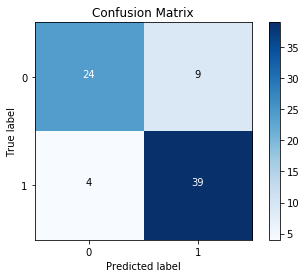

In [14]:
# Plot confusion matrix
plot_conf_matrix(cnf_matrix, set(y),
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

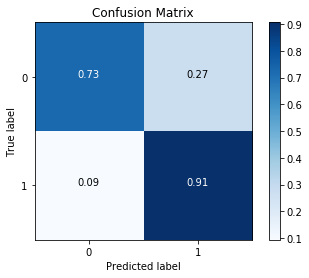

In [15]:
# Plot normalized confusion matrix
plot_conf_matrix(cnf_matrix, set(y),
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

Alternatively, use sklearn's built-in `plot_confusion_matrix`.

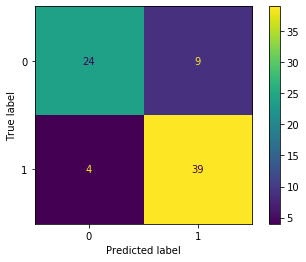

In [18]:
# Using Sklearn
plot_confusion_matrix(logreg, X_test, y_test)
plt.show()